# Time Series Forecasting

# Station "Nouasseur"

#### Data Preparation

In [1]:
import pandas as pd

data_N=pd.read_csv("/kaggle/input/nouasser/era5_cv_Nouasseur.csv",index_col=0)
data_N

,time,latitude,longitude,number,step,surface,valid_time,t2m,cape,tco3,tcw
0,2024-01-01 00:00:00,33.37,-7.58,0,0 days,0.0,2024-01-01 00:00:00,282.51367,0.0,0.006455,17.271850
1,2024-01-01 01:00:00,33.37,-7.58,0,0 days,0.0,2024-01-01 01:00:00,283.32910,0.0,0.006448,18.048431
2,2024-01-01 02:00:00,33.37,-7.58,0,0 days,0.0,2024-01-01 02:00:00,284.28735,0.0,0.006441,18.635818
3,2024-01-01 03:00:00,33.37,-7.58,0,0 days,0.0,2024-01-01 03:00:00,285.26245,0.0,0.006458,19.197357
4,2024-01-01 04:00:00,33.37,-7.58,0,0 days,0.0,2024-01-01 04:00:00,284.84155,0.0,0.006455,19.720535
...,...,...,...,...,...,...,...,...,...,...,...
78907,2016-12-31 19:00:00,33.37,-7.58,0,0 days,0.0,2016-12-31 19:00:00,286.31420,0.0,0.005868,10.800875
78908,2016-12-31 20:00:00,33.37,-7.58,0,0 days,0.0,2016-12-31 20:00:00,285.03760,0.0,0.005876,10.760588
78909,2016-12-31 21:00:00,33.37,-7.58,0,0 days,0.0,2016-12-31 21:00:00,283.72950,0.0,0.005888,10.630710
78910,2016-12-31 22:00:00,33.37,-7.58,0,0 days,0.0,2016-12-31 22:00:00,281.38770,0.0,0.005888,10.451001


In [2]:
data_N=data_N.drop(columns=['latitude','longitude','number','step','surface','valid_time'])
data_N

,time,t2m,cape,tco3,tcw
0,2024-01-01 00:00:00,282.51367,0.0,0.006455,17.271850
1,2024-01-01 01:00:00,283.32910,0.0,0.006448,18.048431
2,2024-01-01 02:00:00,284.28735,0.0,0.006441,18.635818
3,2024-01-01 03:00:00,285.26245,0.0,0.006458,19.197357
4,2024-01-01 04:00:00,284.84155,0.0,0.006455,19.720535
...,...,...,...,...,...
78907,2016-12-31 19:00:00,286.31420,0.0,0.005868,10.800875
78908,2016-12-31 20:00:00,285.03760,0.0,0.005876,10.760588
78909,2016-12-31 21:00:00,283.72950,0.0,0.005888,10.630710
78910,2016-12-31 22:00:00,281.38770,0.0,0.005888,10.451001


In [4]:
data_N.isnull().sum()

time    0
t2m     0
cape    0
tco3    0
tcw     0
dtype: int64

In [3]:
data_N_ordered=data_N.sort_values('time').reset_index(drop=True)
data_N_ordered

,time,t2m,cape,tco3,tcw
0,2016-01-01 00:00:00,284.01074,0.00000,0.006067,12.966702
1,2016-01-01 01:00:00,283.72240,0.00000,0.006056,12.475417
2,2016-01-01 02:00:00,283.30370,0.00000,0.006038,12.003624
3,2016-01-01 03:00:00,282.56323,0.00000,0.006019,11.673781
4,2016-01-01 04:00:00,282.51636,0.00000,0.005998,11.527005
...,...,...,...,...,...
78907,2024-12-31 19:00:00,286.60254,140.42949,0.007496,15.987359
78908,2024-12-31 20:00:00,286.12450,155.24924,0.007494,15.866298
78909,2024-12-31 21:00:00,284.91992,147.02538,0.007508,15.740705
78910,2024-12-31 22:00:00,283.32080,249.19585,0.007510,16.478516


In [4]:
data_N_ordered['time'] = pd.to_datetime(data_N_ordered['time'])
data_N_ordered.set_index('time', inplace=True)
data_N_ordered

,t2m,cape,tco3,tcw
time,,,,
2016-01-01 00:00:00,284.01074,0.00000,0.006067,12.966702
2016-01-01 01:00:00,283.72240,0.00000,0.006056,12.475417
2016-01-01 02:00:00,283.30370,0.00000,0.006038,12.003624
2016-01-01 03:00:00,282.56323,0.00000,0.006019,11.673781
2016-01-01 04:00:00,282.51636,0.00000,0.005998,11.527005
...,...,...,...,...
2024-12-31 19:00:00,286.60254,140.42949,0.007496,15.987359
2024-12-31 20:00:00,286.12450,155.24924,0.007494,15.866298
2024-12-31 21:00:00,284.91992,147.02538,0.007508,15.740705


### Adding new features 

In [5]:
import numpy as np
data_N_ordered['hour'] = data_N_ordered.index.hour
data_N_ordered['dayofyear'] = data_N_ordered.index.dayofyear
data_N_ordered['month'] = data_N_ordered.index.month
data_N_ordered['sin_hour'] = np.sin(2 * np.pi * data_N_ordered.index.hour / 24)
data_N_ordered['cos_hour'] = np.cos(2 * np.pi * data_N_ordered.index.hour / 24)
data_N_ordered

,t2m,cape,tco3,tcw,hour,dayofyear,month,sin_hour,cos_hour
time,,,,,,,,,
2016-01-01 00:00:00,284.01074,0.00000,0.006067,12.966702,0,1,1,0.000000,1.000000
2016-01-01 01:00:00,283.72240,0.00000,0.006056,12.475417,1,1,1,0.258819,0.965926
2016-01-01 02:00:00,283.30370,0.00000,0.006038,12.003624,2,1,1,0.500000,0.866025
2016-01-01 03:00:00,282.56323,0.00000,0.006019,11.673781,3,1,1,0.707107,0.707107
2016-01-01 04:00:00,282.51636,0.00000,0.005998,11.527005,4,1,1,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,286.60254,140.42949,0.007496,15.987359,19,366,12,-0.965926,0.258819
2024-12-31 20:00:00,286.12450,155.24924,0.007494,15.866298,20,366,12,-0.866025,0.500000
2024-12-31 21:00:00,284.91992,147.02538,0.007508,15.740705,21,366,12,-0.707107,0.707107


### Temperature Visualization

In [6]:
#Converting temperature to celcius

data_N_ordered['t2m_C'] = data_N_ordered['t2m'] - 273.15
data_N_ordered

,t2m,cape,tco3,tcw,hour,dayofyear,month,sin_hour,cos_hour,t2m_C
time,,,,,,,,,,
2016-01-01 00:00:00,284.01074,0.00000,0.006067,12.966702,0,1,1,0.000000,1.000000,10.86074
2016-01-01 01:00:00,283.72240,0.00000,0.006056,12.475417,1,1,1,0.258819,0.965926,10.57240
2016-01-01 02:00:00,283.30370,0.00000,0.006038,12.003624,2,1,1,0.500000,0.866025,10.15370
2016-01-01 03:00:00,282.56323,0.00000,0.006019,11.673781,3,1,1,0.707107,0.707107,9.41323
2016-01-01 04:00:00,282.51636,0.00000,0.005998,11.527005,4,1,1,0.866025,0.500000,9.36636
...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,286.60254,140.42949,0.007496,15.987359,19,366,12,-0.965926,0.258819,13.45254
2024-12-31 20:00:00,286.12450,155.24924,0.007494,15.866298,20,366,12,-0.866025,0.500000,12.97450
2024-12-31 21:00:00,284.91992,147.02538,0.007508,15.740705,21,366,12,-0.707107,0.707107,11.76992


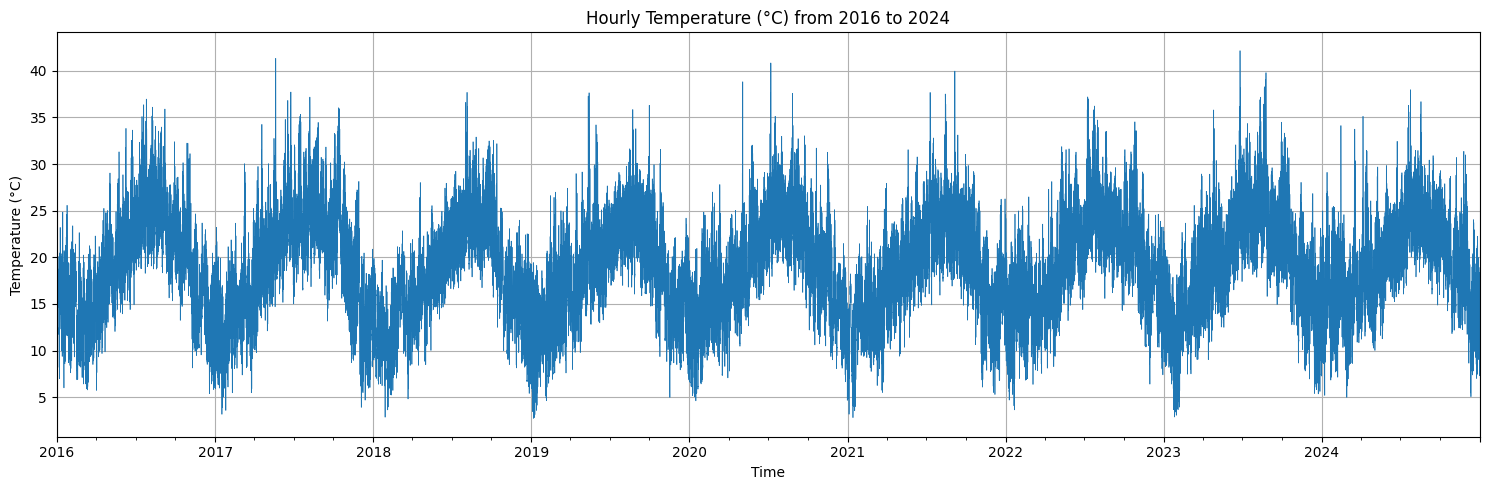

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
data_N_ordered['t2m_C'].plot(linewidth=0.5)
plt.title("Hourly Temperature (°C) from 2016 to 2024")
plt.ylabel("Temperature (°C)")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Daily Average Temperature (°C)'}, xlabel='time'>

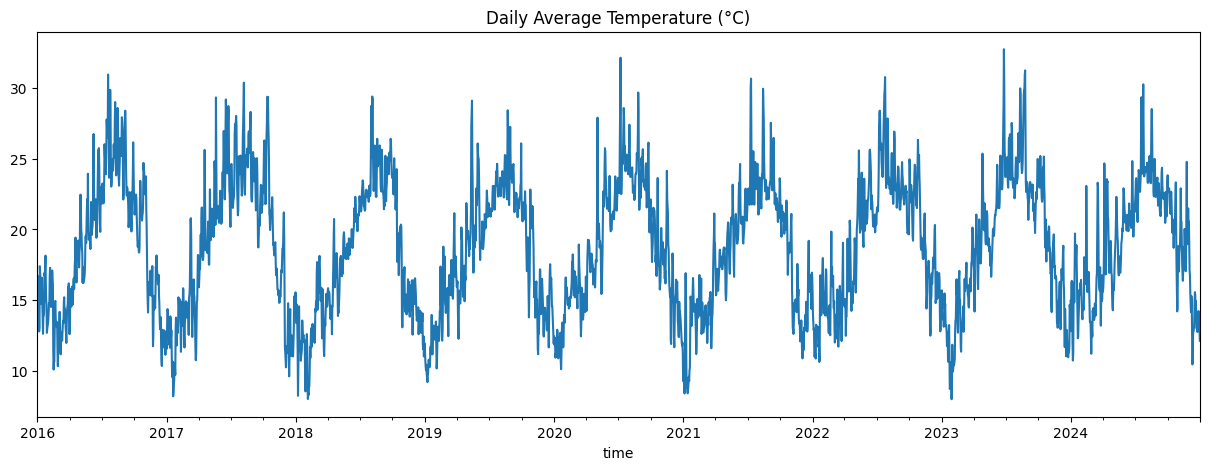

In [23]:
#Daily Average Temperature
data_N_ordered['t2m_C'].resample('D').mean().plot(figsize=(15, 5), title="Daily Average Temperature (°C)")


/tmp/ipykernel_36/2625268278.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_N_ordered['t2m_C'].resample('M').mean().plot(figsize=(15, 5), title="Monthly Average Temperature (°C)")


<Axes: title={'center': 'Monthly Average Temperature (°C)'}, xlabel='time'>

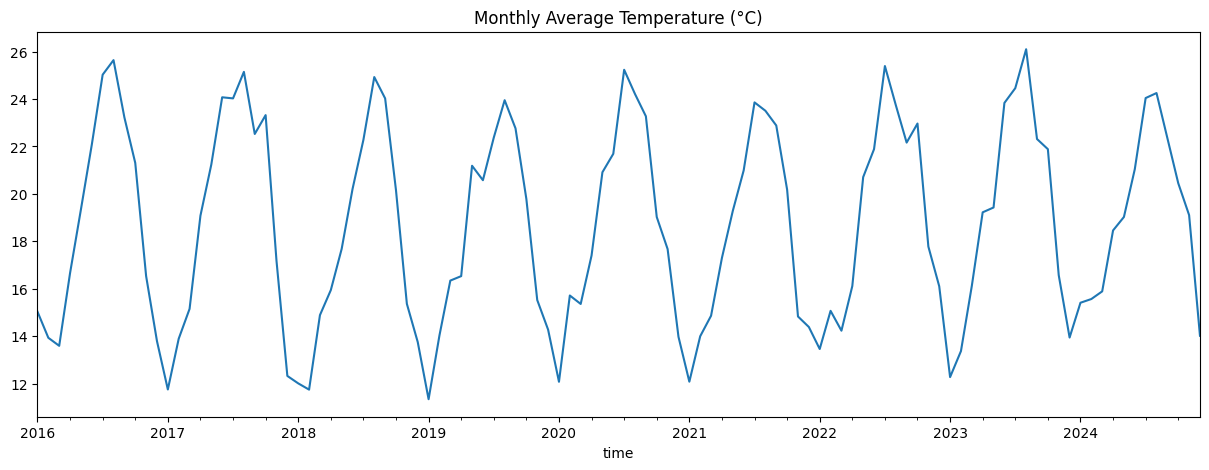

In [24]:
#Monthly Average Temperature

data_N_ordered['t2m_C'].resample('M').mean().plot(figsize=(15, 5), title="Monthly Average Temperature (°C)")


<Axes: xlabel='month', ylabel='t2m_C'>

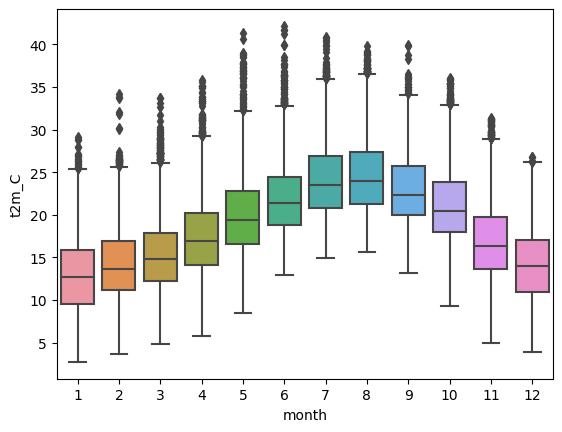

In [25]:
#Boxplot by Month

import seaborn as sns
sns.boxplot(x='month', y='t2m_C', data=data_N_ordered)

<Axes: xlabel='hour', ylabel='t2m_C'>

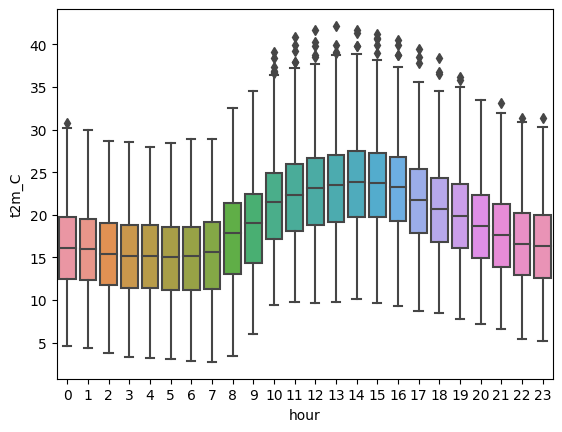

In [26]:
#Boxplot by Hour of Day

sns.boxplot(x='hour', y='t2m_C', data=data_N_ordered)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

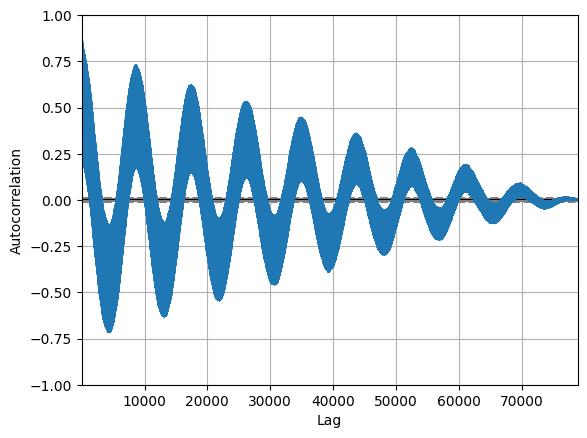

In [27]:
#Autocorrelation_plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_N_ordered['t2m_C'])


##### Temperature data shows strong, repeating daily patterns that slowly lose influence over time 

# ARIMA

## Hyperparameters

#### Stationarity

In [28]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_N_ordered['t2m_C'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -8.82149448499209
p-value: 1.8719978596754934e-14


#### The data is stationary, so:&nbsp;  &nbsp;  &nbsp;       $d=0$

#### AR & MA

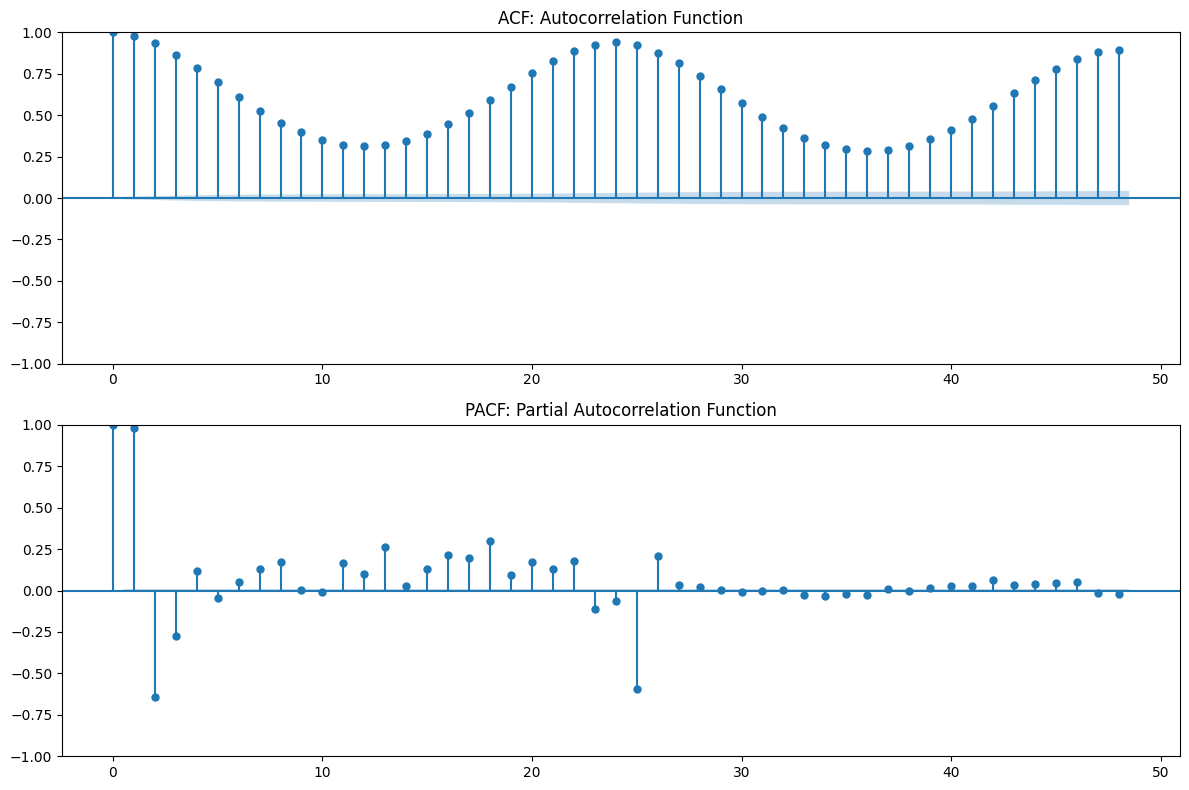

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data_N_ordered['t2m_C'], lags=48, ax=axes[0])
axes[0].set_title("ACF: Autocorrelation Function")

plot_pacf(data_N_ordered['t2m_C'], lags=48, ax=axes[1], method='ywm')
axes[1].set_title("PACF: Partial Autocorrelation Function")

plt.tight_layout()
plt.show()

#### PACF has significant spikes at lag 1, and also at lag 2, so let's work with:&nbsp;  &nbsp;  &nbsp; $p=2$.

#### But for the ACF, It doesn’t cut off clearly after a few lags. Instead, it shows smooth sinusoidal decay. This suggests: The non-seasonal MA part is not dominant, so we will start with:&nbsp;  &nbsp;  &nbsp; $q=1$.

#### And due to seasonality we will work with SARIMA (Seasonal ARIMA)

# SARIMA

#### Since we have an hourly dataset, then:&nbsp;  $s=24$.

#### Seasonal ACF decays slowly and Seasonal coefficients are near 1.0, so:&nbsp; $D=1$.

#### From ACF, since we have a strong spike at $lag=24$, then: &nbsp; $Q=1$ &nbsp; and &nbsp; $P=1$.

#### Split data

In [7]:
# Split by time
train = data_N_ordered.loc['2020':'2023']
test = data_N_ordered.loc['2024':]

print("Train size:", train.shape)
print("Test size:", test.shape)

Train size: (35064, 10)
Test size: (8784, 10)


#### Fitting the model

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (2, 0, 1)          # (p, d, q)
seasonal_order = (1, 1, 1, 24)  # (P, D, Q, s)
model = SARIMAX(train['t2m_C'],
                order=order,
                seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              t2m_C   No. Observations:                35064
Model:             SARIMAX(2, 0, 1)x(1, 1, 1, 24)   Log Likelihood              -22798.552
Date:                            Wed, 30 Jul 2025   AIC                          45609.105
Time:                                    16:09:28   BIC                          45659.890
Sample:                                01-01-2020   HQIC                         45625.280
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4943      0.010    153.578      0.000       1.475       1.513
ar.L2         -0.5289      0.009   

    All coefficients are significant (p-values < 0.05).

    Ljung-Box (Q): Prob(Q)=0.69   →  no Residuals autocorrelation.

    Jarque-Bera = 23816.18: Indicates non-normal residuals.

    Heteroskedasticity p-value = 0.00: Suggests changing variance over time.

In [10]:
n_test = len(test)

forecast = results.forecast(steps=n_test)
forecast.index = test.index  # to align the index


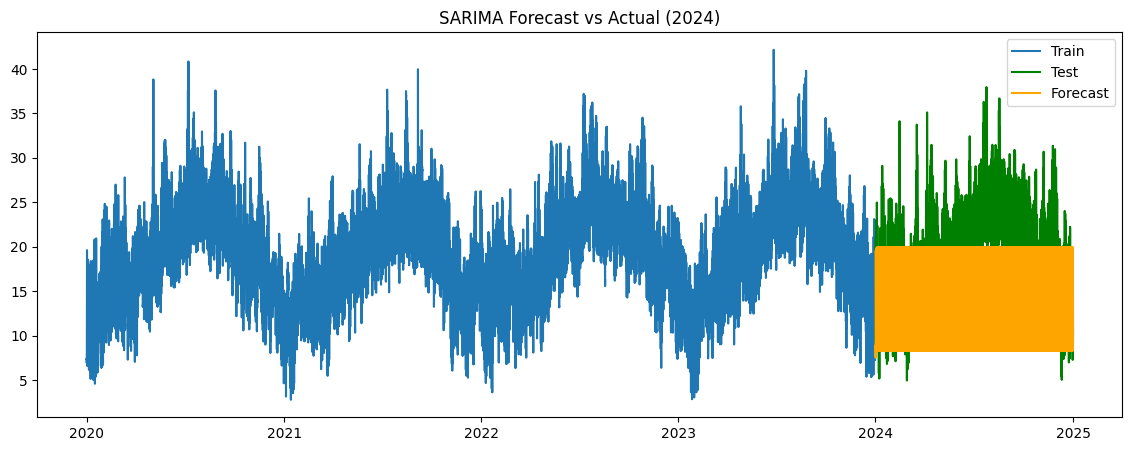

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(train['t2m_C'], label='Train')
plt.plot(test['t2m_C'], label='Test', color='green')
plt.plot(forecast, label='Forecast', color='orange')
plt.legend()
plt.title("SARIMA Forecast vs Actual (2024)")
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test['t2m_C'], forecast))
mae = mean_absolute_error(test['t2m_C'], forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 7.43
MAE: 6.33


In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (3, 0, 3)          # (p, d, q)
seasonal_order = (2, 1, 2, 24)  # (P, D, Q, s)
model = SARIMAX(train['t2m_C'],
                order=order,
                seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                   t2m_C   No. Observations:                35064
Model:             SARIMAX(3, 0, 3)x(2, 1, [1, 2], 24)   Log Likelihood              -22775.662
Date:                                 Wed, 30 Jul 2025   AIC                          45573.323
Time:                                         16:26:36   BIC                          45666.430
Sample:                                     01-01-2020   HQIC                         45602.979
                                          - 12-31-2023                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7609      0.240      3.168      0.002       0.290       1

In [9]:
n_test = len(test)

forecast = results.forecast(steps=n_test)
forecast.index = test.index

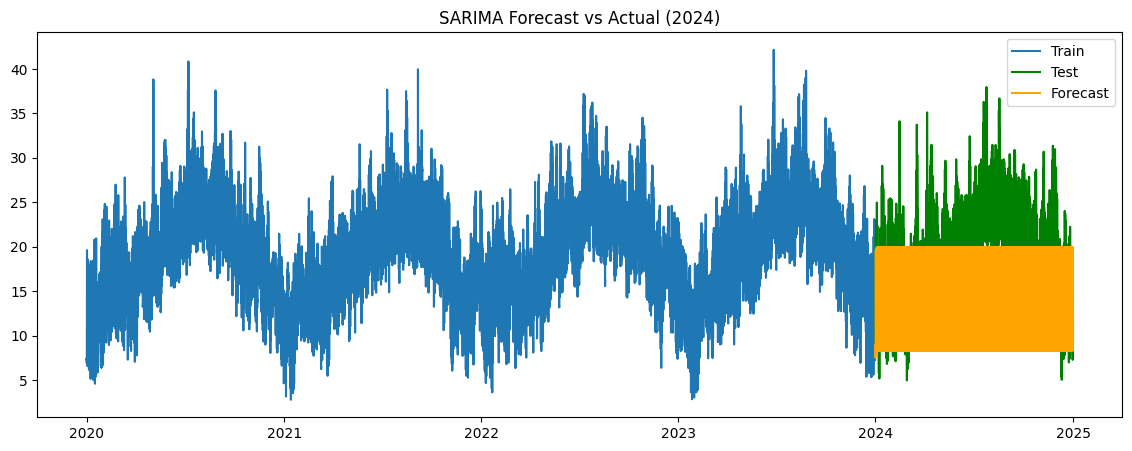

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(train['t2m_C'], label='Train')
plt.plot(test['t2m_C'], label='Test', color='green')
plt.plot(forecast, label='Forecast', color='orange')
plt.legend()
plt.title("SARIMA Forecast vs Actual (2024)")
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test['t2m_C'], forecast))
mae = mean_absolute_error(test['t2m_C'], forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 7.40
MAE: 6.30


# LSTM

In [2]:
import pandas as pd
import numpy as np

data_N=pd.read_csv("/kaggle/input/nouasser/era5_cv_Nouasseur.csv",index_col=0)
data_N=data_N.drop(columns=['latitude','longitude','number','step','surface','valid_time','cape','tco3','tcw'])
data_N_ordered=data_N.sort_values('time').reset_index(drop=True)
data_N_ordered['time'] = pd.to_datetime(data_N_ordered['time'])
data_N_ordered.set_index('time', inplace=True)
data_N_ordered['t2m_C'] = data_N_ordered['t2m'] - 273.15
data_N_ordered=data_N_ordered.drop(columns='t2m')
data_N_ordered




,t2m_C
time,
2016-01-01 00:00:00,10.86074
2016-01-01 01:00:00,10.57240
2016-01-01 02:00:00,10.15370
2016-01-01 03:00:00,9.41323
2016-01-01 04:00:00,9.36636
...,...
2024-12-31 19:00:00,13.45254
2024-12-31 20:00:00,12.97450
2024-12-31 21:00:00,11.76992


In [3]:
# Split by time
train = data_N_ordered.loc['2020':'2023']
test = data_N_ordered.loc['2024':]

print("Train size:", train.shape)
print("Test size:", test.shape)

Train size: (35064, 1)
Test size: (8784, 1)


In [4]:
#scaling
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

### One_hour Prediction

In [9]:
# Create Sequences
def create_sequences(data, n_steps=168):  # 1 week lookback
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, :])  # All features
        y.append(data[i, 0])   # First column is t2m_C
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled)
X_test, y_test = create_sequences(test_scaled)

In [17]:
# Build LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


In [19]:
#Train

history = model.fit(X_train, y_train, 
                   epochs=30, 
                   batch_size=32,
                   validation_data=(X_test, y_test),
                   shuffle=False)

Epoch 1/30
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 92s 81ms/step - loss: 0.0084 - val_loss: 0.0052
Epoch 2/30
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 89s 82ms/step - loss: 9.7294e-04 - val_loss: 0.0022
Epoch 3/30
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 91s 84ms/step - loss: 7.0053e-04 - val_loss: 0.0021
Epoch 4/30
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 95s 87ms/step - loss: 5.8126e-04 - val_loss: 0.0020
Epoch 5/30
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 99s 91ms/step - loss: 5.2643e-04 - val_loss: 0.0016
Epoch 6/30
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 95s 87ms/step - loss: 4.9493e-04 - val_loss: 0.0013
Epoch 7/30
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 91s 83ms/step - loss: 4.7608e-04 - val_loss: 0.0010
Epoch 8/30
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 93s 86ms/step - loss: 4.5795e-04 - val_loss: 8.4628e-04
Epoch 9/30
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 95s 87ms/step - loss: 4.4672e-04 - val_loss: 8.0438e-04
Epoch 10/30
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 96s 88ms/step - loss: 4.4030e-04 - val_loss: 8.0367e-04
Epoch 11/30
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 101s 93m

In [20]:
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

270/270 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step


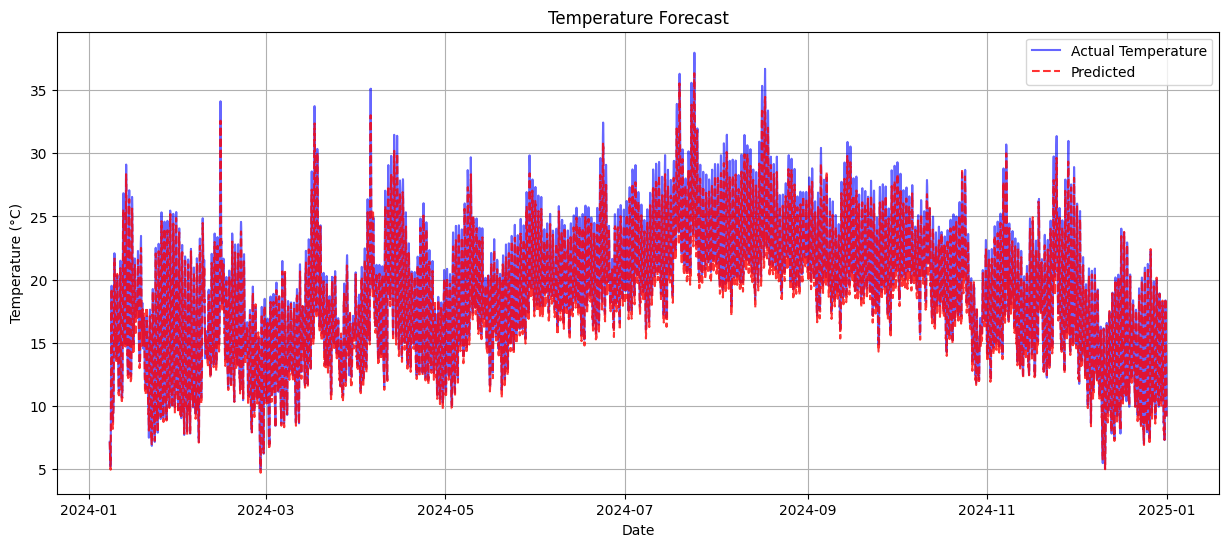

In [25]:
n_steps=168
y_test_true = test.iloc[n_steps:]['t2m_C'].values  
plot_dates = test.index[n_steps:]
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))


plt.plot(plot_dates, y_test_true, label='Actual Temperature', color='blue', alpha=0.6)


plt.plot(plot_dates, test_predictions, label='Predicted', color='red', linestyle='--', alpha=0.8)

plt.title('Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

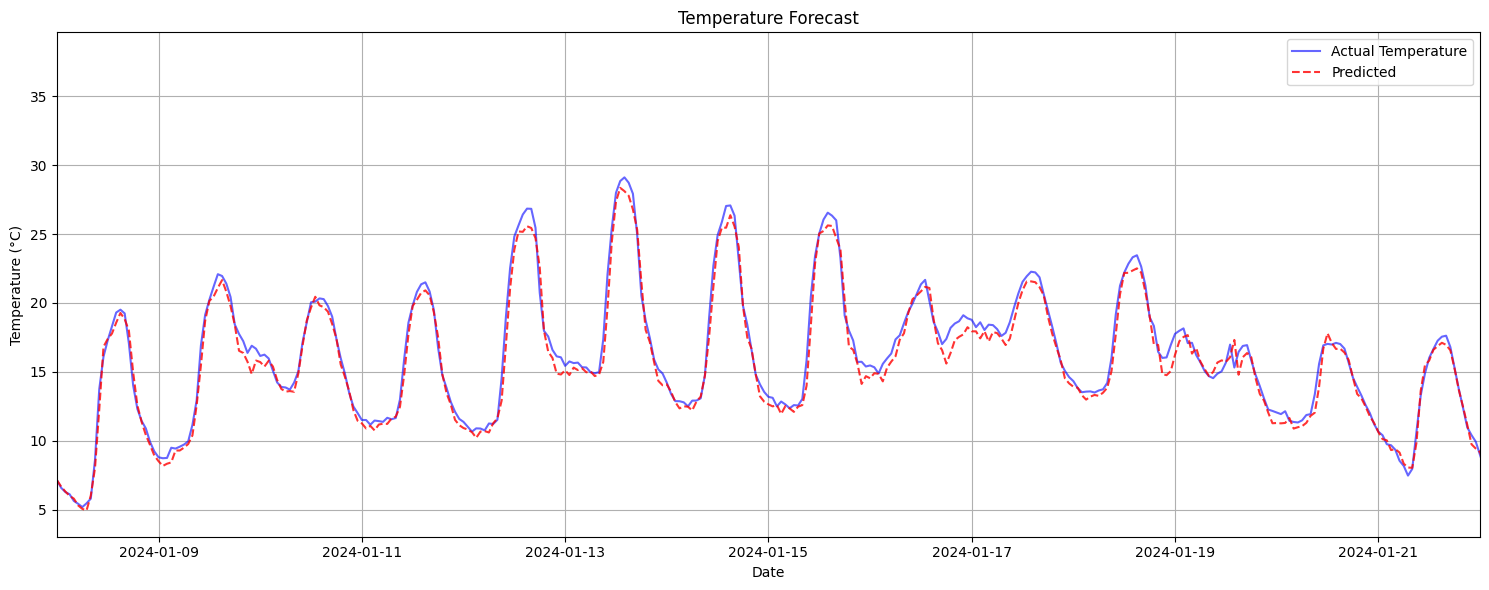

In [27]:
n_steps=168
y_test_true = test.iloc[n_steps:]['t2m_C'].values  
plot_dates = test.index[n_steps:]
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))


plt.plot(plot_dates, y_test_true, label='Actual Temperature', color='blue', alpha=0.6)


plt.plot(plot_dates, test_predictions, label='Predicted', color='red', linestyle='--', alpha=0.8)

plt.title('Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

plt.xlim([plot_dates[0], plot_dates[336]]) 
plt.tight_layout()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test_true, test_predictions))
mae = mean_absolute_error(y_test_true, test_predictions)

print(f"RMSE: {rmse:.2f}°C")
print(f"MAE: {mae:.2f}°C")

RMSE: 0.88°C
MAE: 0.71°C


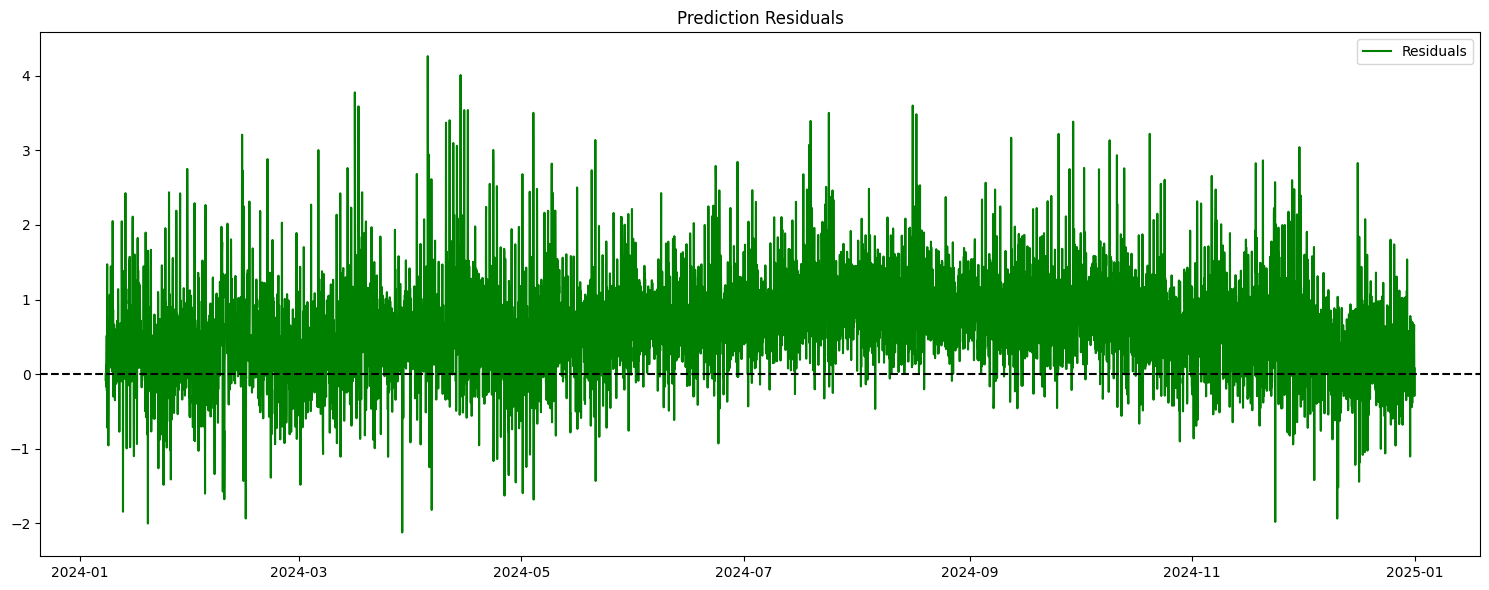

In [31]:
# Calculate residuals
residuals = y_test_true - test_predictions.flatten()

plt.figure(figsize=(15, 6))


# Residual plot
plt.plot(plot_dates, residuals, color='green', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Prediction Residuals')
plt.legend()

plt.tight_layout()
plt.show()

### One_day Prediction

In [5]:
import numpy as np

def create_sequences(data, n_steps=168, n_ahead=24):  
    # n_steps: lookback window (1 week = 168 hours)
    # n_ahead: forecast horizon (1 day = 24 hours)
    X, y = [], []
    for i in range(n_steps, len(data) - n_ahead + 1):
        X.append(data[i-n_steps:i, :])  # All features
        y.append(data[i:i+n_ahead, 0])   # Next 24 values of t2m_C
    return np.array(X), np.array(y)

# Create sequences with 168-hour lookback and 24-hour prediction
X_train, y_train = create_sequences(train_scaled)
X_test, y_test = create_sequences(test_scaled)

#### Encoder-Decoder

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

model = Sequential([
    # Encoder
    LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    
    # Decoder
    RepeatVector(24),  # Repeat the encoded vector for each output time step
    LSTM(128, activation='relu', return_sequences=True),
    
    # Output layer
    TimeDistributed(Dense(1))  # Predict 1 value per time step
])

model.compile(optimizer='adam', loss='mse')

model.summary()


2025-08-10 16:14:27.041710: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 24, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 24, 1)          │           129 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,273 (774.50 KB)

 Trainable params: 198,273 (774.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop if no improvement for 5 epochs
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    shuffle=False
)

Epoch 1/100
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 179s 158ms/step - loss: 0.0141 - val_loss: 0.0335
Epoch 2/100
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 170s 156ms/step - loss: 0.0111 - val_loss: 0.0366
Epoch 3/100
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 171s 157ms/step - loss: 0.0066 - val_loss: 0.0231
Epoch 4/100
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 170s 156ms/step - loss: 0.0032 - val_loss: 0.0208
Epoch 5/100
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 171s 157ms/step - loss: 0.0029 - val_loss: 0.0176
Epoch 6/100
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 170s 156ms/step - loss: 0.0027 - val_loss: 0.0168
Epoch 7/100
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 175s 161ms/step - loss: 0.0025 - val_loss: 0.0162
Epoch 8/100
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 173s 158ms/step - loss: 0.0024 - val_loss: 0.0155
Epoch 9/100
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 173s 159ms/step - loss: 0.0023 - val_loss: 0.0144
Epoch 10/100
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 174s 160ms/step - loss: 0.0022 - val_loss: 0.0132
Epoch 11/100
1090/1090 ━━━━━━━━━━━━━━━━━━━━ 173s 159ms/step - loss: 0

In [8]:
# Predict on test data
y_pred = model.predict(X_test)

# Reshape predictions for inverse scaling
# y_pred will have shape (samples, 24, 1)
y_pred_reshaped = y_pred.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# Inverse transform the scaled data
y_pred_inv = scaler.inverse_transform(y_pred_reshaped).reshape(-1, 24)
y_test_inv = scaler.inverse_transform(y_test_reshaped).reshape(-1, 24)

269/269 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step


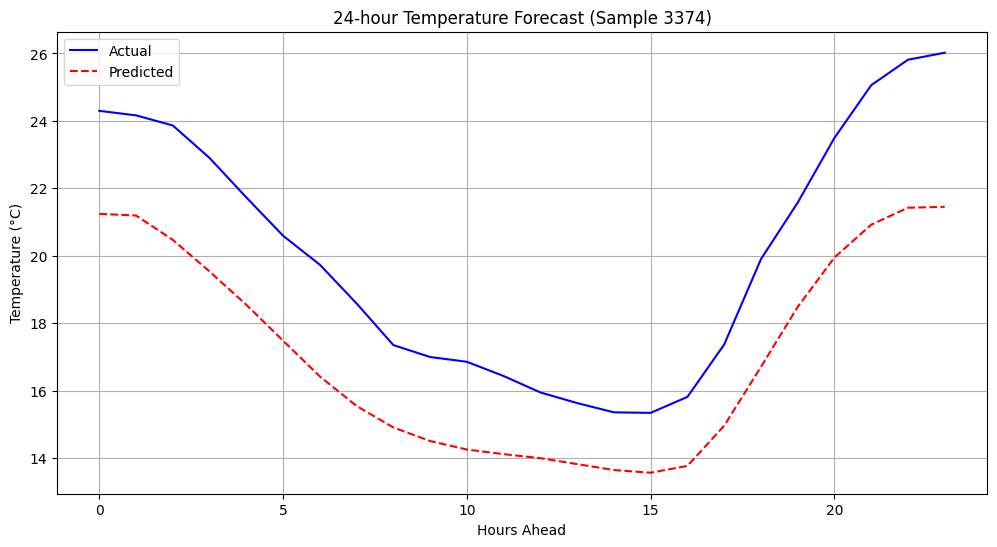

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Choose a random test sample
sample_idx = np.random.randint(0, len(X_test))
hours = range(24)

plt.figure(figsize=(12, 6))
plt.plot(hours, y_test_inv[sample_idx], 'b-', label='Actual')
plt.plot(hours, y_pred_inv[sample_idx], 'r--', label='Predicted')
plt.title(f"24-hour Temperature Forecast (Sample {sample_idx})")
plt.xlabel("Hours Ahead")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

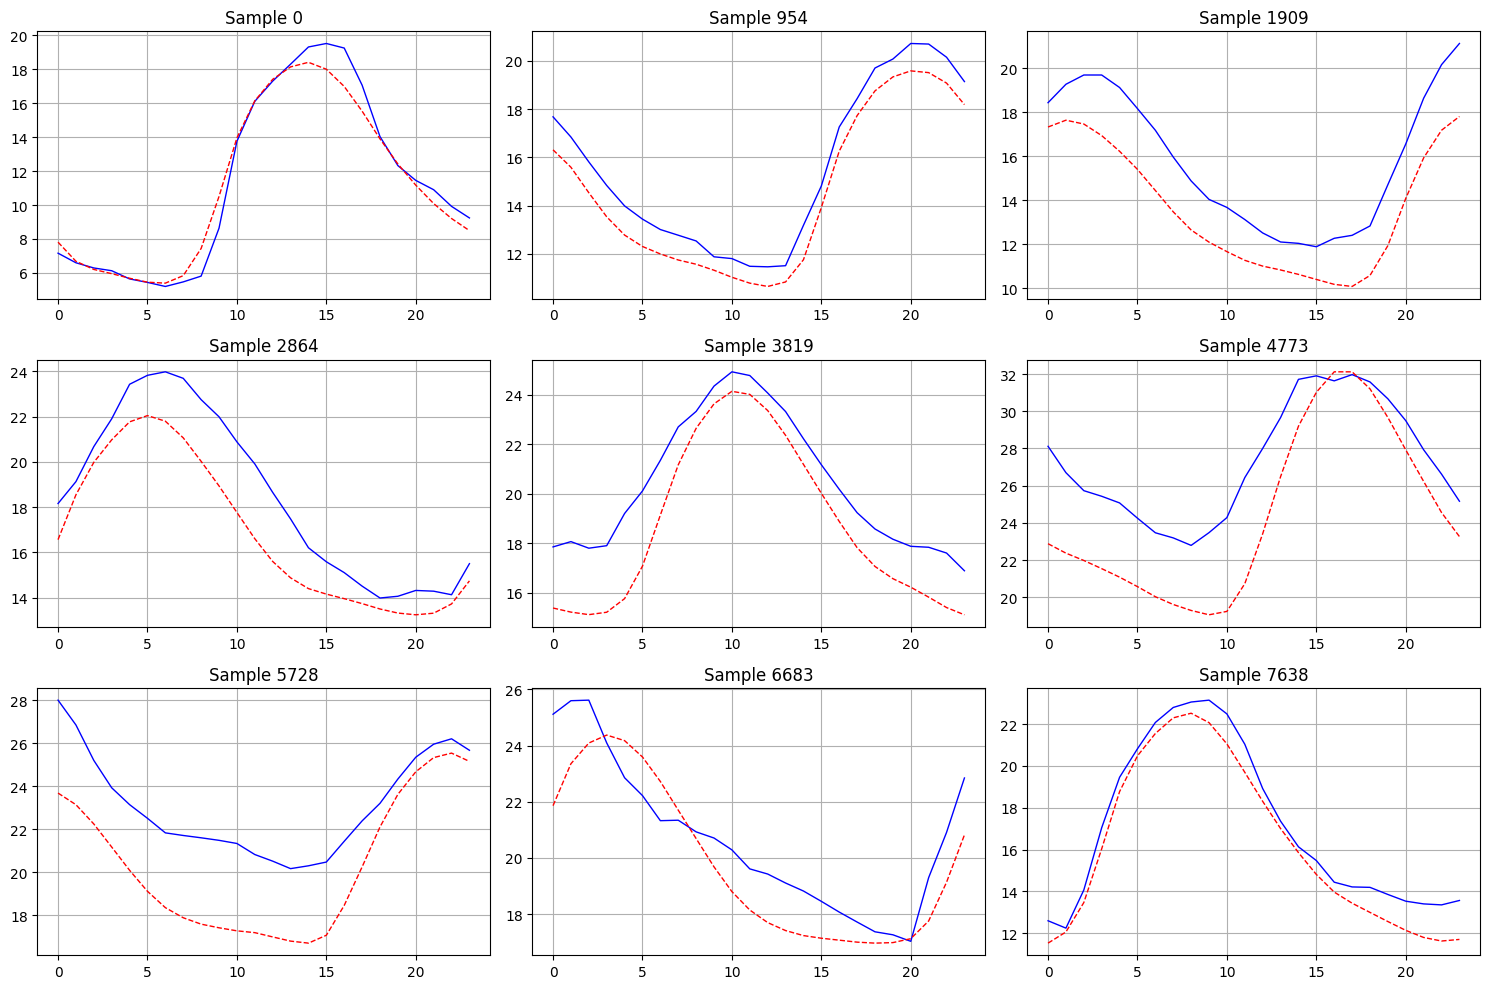

In [10]:
plt.figure(figsize=(15, 10))
for i in range(9):  # Show 3x3 grid of predictions
    plt.subplot(3, 3, i+1)
    sample_idx = i * len(X_test) // 9  # Spread samples evenly
    plt.plot(y_test_inv[sample_idx], 'b-', linewidth=1)
    plt.plot(y_pred_inv[sample_idx], 'r--', linewidth=1)
    plt.title(f"Sample {sample_idx}")
    plt.grid(True)
plt.tight_layout()
plt.show()


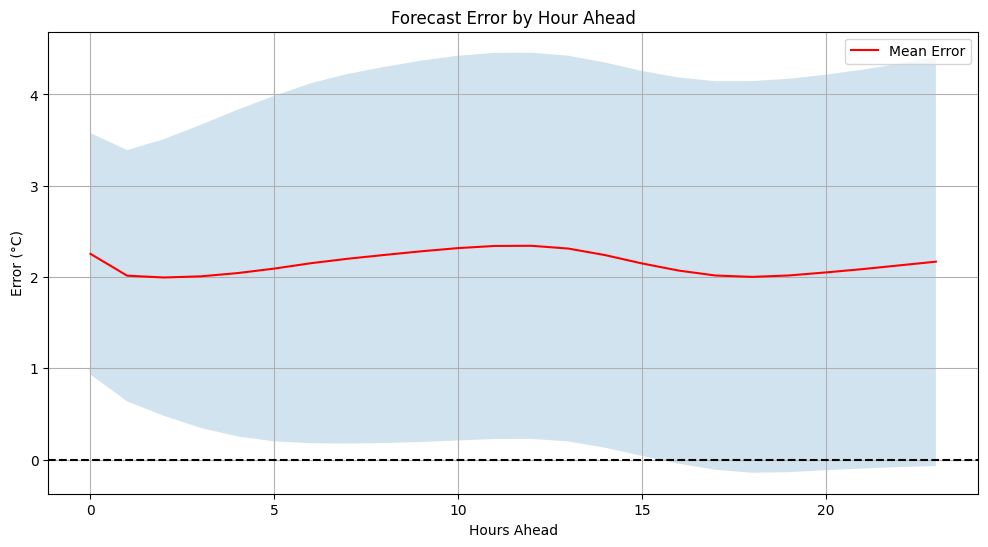

In [11]:
errors = y_test_inv - y_pred_inv
mean_errors = np.mean(errors, axis=0)
std_errors = np.std(errors, axis=0)

plt.figure(figsize=(12, 6))
plt.fill_between(range(24), mean_errors - std_errors, mean_errors + std_errors, alpha=0.2)
plt.plot(mean_errors, 'r-', label='Mean Error')
plt.axhline(0, color='k', linestyle='--')
plt.title("Forecast Error by Hour Ahead")
plt.xlabel("Hours Ahead")
plt.ylabel("Error (°C)")
plt.legend()
plt.grid(True)
plt.show()

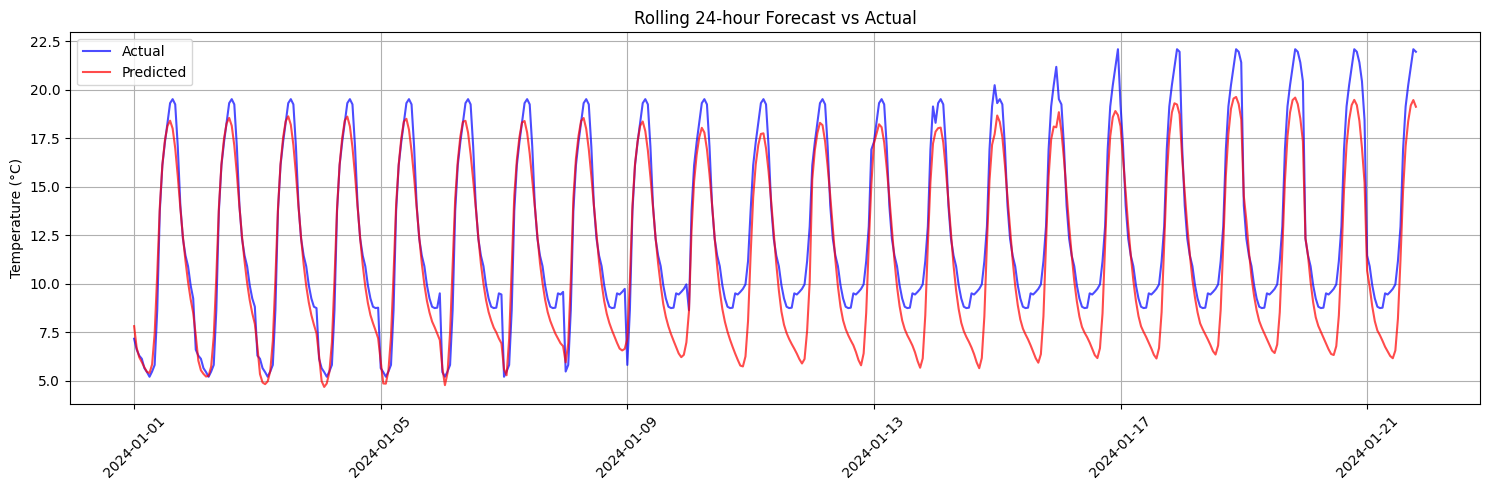

In [12]:
# Flatten all predictions and actuals with timestamps
all_dates = data_N_ordered.loc['2024':].index[:len(y_test_inv)*24]
all_actual = y_test_inv.ravel()
all_pred = y_pred_inv.ravel()

plt.figure(figsize=(15, 5))
plt.plot(all_dates[:500], all_actual[:500], 'b-', label='Actual', alpha=0.7)
plt.plot(all_dates[:500], all_pred[:500], 'r-', label='Predicted', alpha=0.7)
plt.title("Rolling 24-hour Forecast vs Actual")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

MAE for hour 1: 2.27°C
MAE for hour 2: 2.09°C
MAE for hour 3: 2.12°C
MAE for hour 4: 2.18°C
MAE for hour 5: 2.27°C
MAE for hour 6: 2.35°C
MAE for hour 7: 2.43°C
MAE for hour 8: 2.49°C
MAE for hour 9: 2.53°C
MAE for hour 10: 2.57°C
MAE for hour 11: 2.61°C
MAE for hour 12: 2.63°C
MAE for hour 13: 2.63°C
MAE for hour 14: 2.61°C
MAE for hour 15: 2.55°C
MAE for hour 16: 2.49°C
MAE for hour 17: 2.44°C
MAE for hour 18: 2.41°C
MAE for hour 19: 2.40°C
MAE for hour 20: 2.42°C
MAE for hour 21: 2.44°C
MAE for hour 22: 2.47°C
MAE for hour 23: 2.51°C
MAE for hour 24: 2.55°C


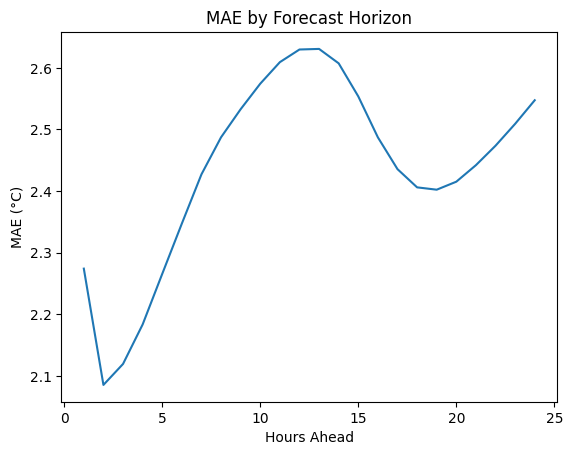

In [13]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for each forecast horizon (1-24 hours)
mae_per_hour = []
for hour in range(24):
    mae = mean_absolute_error(y_test_inv[:, hour], y_pred_inv[:, hour])
    mae_per_hour.append(mae)
    print(f"MAE for hour {hour+1}: {mae:.2f}°C")

# Plot MAE across horizon
import matplotlib.pyplot as plt
plt.plot(range(1, 25), mae_per_hour)
plt.title('MAE by Forecast Horizon')
plt.xlabel('Hours Ahead')
plt.ylabel('MAE (°C)')
plt.show()

This model needs some additional tuning to improve results, but due to the long computation time, I'll keep it as-is and proceed to multivariate LSTM forecasting.

# Multivariate LSTM for CAPE forecasting

In [1]:
import pandas as pd
import numpy as np

data_N=pd.read_csv("/kaggle/input/nouasser/era5_cv_Nouasseur.csv",index_col=0)
data_N=data_N.drop(columns=['latitude','longitude','number','step','surface','valid_time'])
data_N_ordered=data_N.sort_values('time').reset_index(drop=True)
data_N_ordered['time'] = pd.to_datetime(data_N_ordered['time'])
data_N_ordered.set_index('time', inplace=True)
data_N_ordered

,t2m,cape,tco3,tcw
time,,,,
2016-01-01 00:00:00,284.01074,0.00000,0.006067,12.966702
2016-01-01 01:00:00,283.72240,0.00000,0.006056,12.475417
2016-01-01 02:00:00,283.30370,0.00000,0.006038,12.003624
2016-01-01 03:00:00,282.56323,0.00000,0.006019,11.673781
2016-01-01 04:00:00,282.51636,0.00000,0.005998,11.527005
...,...,...,...,...
2024-12-31 19:00:00,286.60254,140.42949,0.007496,15.987359
2024-12-31 20:00:00,286.12450,155.24924,0.007494,15.866298
2024-12-31 21:00:00,284.91992,147.02538,0.007508,15.740705


#### Data Preparation

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Split data
train = data_N_ordered.loc['2016':'2023']
test = data_N_ordered.loc['2024':]

# Scale features separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

train_scaled = train.copy()
test_scaled = test.copy()

train_scaled[['t2m', 'tco3', 'tcw']] = feature_scaler.fit_transform(train[['t2m', 'tco3', 'tcw']])
train_scaled['cape'] = target_scaler.fit_transform(train[['cape']])

test_scaled[['t2m', 'tco3', 'tcw']] = feature_scaler.transform(test[['t2m', 'tco3', 'tcw']])
test_scaled['cape'] = target_scaler.transform(test[['cape']])

#### Create sequence

In [4]:
def create_multivariate_sequences(data, target_col='cape', n_steps=168, n_ahead=24):
    X, y = [], []
    for i in range(n_steps, len(data) - n_ahead + 1):
        X.append(data.iloc[i-n_steps:i, :].values)  # All 4 features
        y.append(data.iloc[i:i+n_ahead][target_col].values)  # Only CAPE
    return np.array(X), np.array(y)

X_train, y_train = create_multivariate_sequences(train_scaled)
X_test, y_test = create_multivariate_sequences(test_scaled)

### Encoder-Decoder with Attention

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed, Attention, Concatenate  

# Encoder
encoder_inputs = Input(shape=(168, 4))
encoder = LSTM(128, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# Decoder
decoder_inputs = RepeatVector(24)(encoder_outputs[:, -1, :])
decoder_lstm = LSTM(128, return_sequences=True)
decoder_outputs = decoder_lstm(decoder_inputs, initial_state=[state_h, state_c])

# Attention
attention = Attention()([decoder_outputs, encoder_outputs])
decoder_combined = Concatenate()([decoder_outputs, attention])

# Output
outputs = TimeDistributed(Dense(1))(decoder_combined)

model = Model(encoder_inputs, outputs)
model.compile(optimizer='adam', loss='mse')

#### Training

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=3)
]

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    shuffle=False
)

Epoch 1/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 341s 305ms/step - loss: 0.0053 - val_loss: 0.0031 - learning_rate: 0.0010
Epoch 2/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 338s 310ms/step - loss: 0.0041 - val_loss: 0.0029 - learning_rate: 0.0010
Epoch 3/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 329s 301ms/step - loss: 0.0039 - val_loss: 0.0028 - learning_rate: 0.0010
Epoch 4/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 319s 292ms/step - loss: 0.0038 - val_loss: 0.0028 - learning_rate: 0.0010
Epoch 5/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 314s 287ms/step - loss: 0.0037 - val_loss: 0.0028 - learning_rate: 0.0010
Epoch 6/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 317s 290ms/step - loss: 0.0038 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 7/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 315s 289ms/step - loss: 0.0036 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 8/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 313s 287ms/step - loss: 0.0036 - val_loss: 0.0028 - learning_rate: 1.0000e-04
Epoch 9/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 313s 287ms/step - loss: 0.

In [14]:
# Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_cape = target_scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1, 24)
y_true_cape = target_scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1, 24)

# Hourly MAE
for hour in range(24):
    mae = np.mean(np.abs(y_true_cape[:, hour] - y_pred_cape[:, hour]))
    print(f"Hour {hour+1} MAE: {mae:.2f} J/kg")
otlib=True

269/269 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step
Hour 1 MAE: 32.54 J/kg
Hour 2 MAE: 42.42 J/kg
Hour 3 MAE: 47.48 J/kg
Hour 4 MAE: 51.89 J/kg
Hour 5 MAE: 55.57 J/kg
Hour 6 MAE: 58.76 J/kg
Hour 7 MAE: 61.45 J/kg
Hour 8 MAE: 63.78 J/kg
Hour 9 MAE: 65.66 J/kg
Hour 10 MAE: 67.23 J/kg
Hour 11 MAE: 68.52 J/kg
Hour 12 MAE: 69.73 J/kg
Hour 13 MAE: 70.93 J/kg
Hour 14 MAE: 72.14 J/kg
Hour 15 MAE: 73.25 J/kg
Hour 16 MAE: 74.08 J/kg
Hour 17 MAE: 74.63 J/kg
Hour 18 MAE: 74.97 J/kg
Hour 19 MAE: 75.12 J/kg
Hour 20 MAE: 75.31 J/kg
Hour 21 MAE: 75.34 J/kg
Hour 22 MAE: 75.51 J/kg
Hour 23 MAE: 75.86 J/kg
Hour 24 MAE: 76.33 J/kg


#### The multivariate LSTM's performance is excellent for CAPE forecasting.

#### Hour 1 MAE (32 J/kg) is precise enough for nowcasting

#### 24h MAE (76 J/kg) still discriminates between stable/unstable air masses

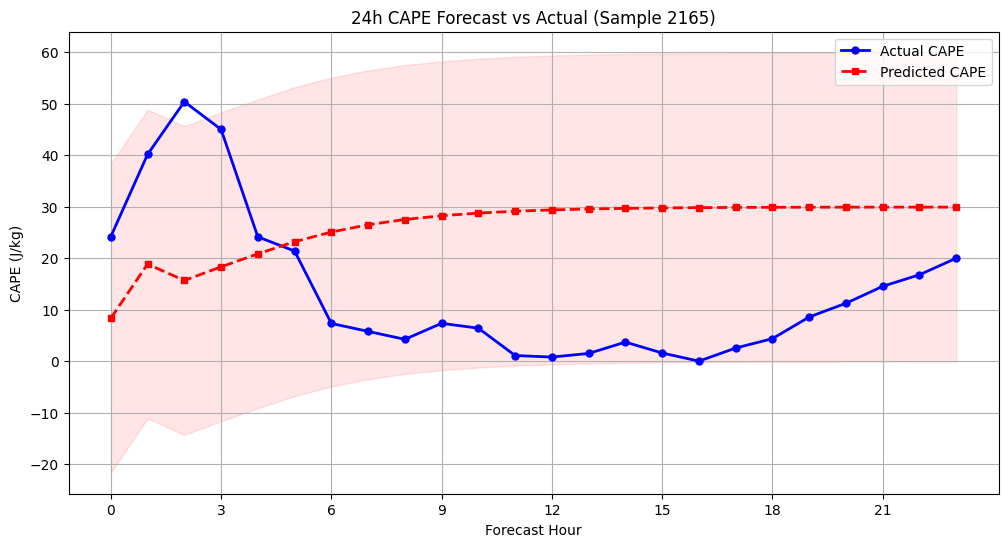

In [17]:
#Single Random Sample Visualization

import matplotlib.pyplot as plt
import numpy as np

# Select a random test case
idx = np.random.randint(0, len(y_test))
hours = np.arange(24)

plt.figure(figsize=(12, 6))
plt.plot(hours, y_true_cape[idx], 'b-o', label='Actual CAPE', linewidth=2, markersize=5)
plt.plot(hours, y_pred_cape[idx], 'r--s', label='Predicted CAPE', linewidth=2, markersize=5)
plt.fill_between(hours, 
                 y_pred_cape[idx] - 30,  # Uncertainty band
                 y_pred_cape[idx] + 30,
                 color='r', alpha=0.1)
plt.title(f"24h CAPE Forecast vs Actual (Sample {idx})")
plt.xlabel("Forecast Hour")
plt.ylabel("CAPE (J/kg)")
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24, 3))
plt.show()

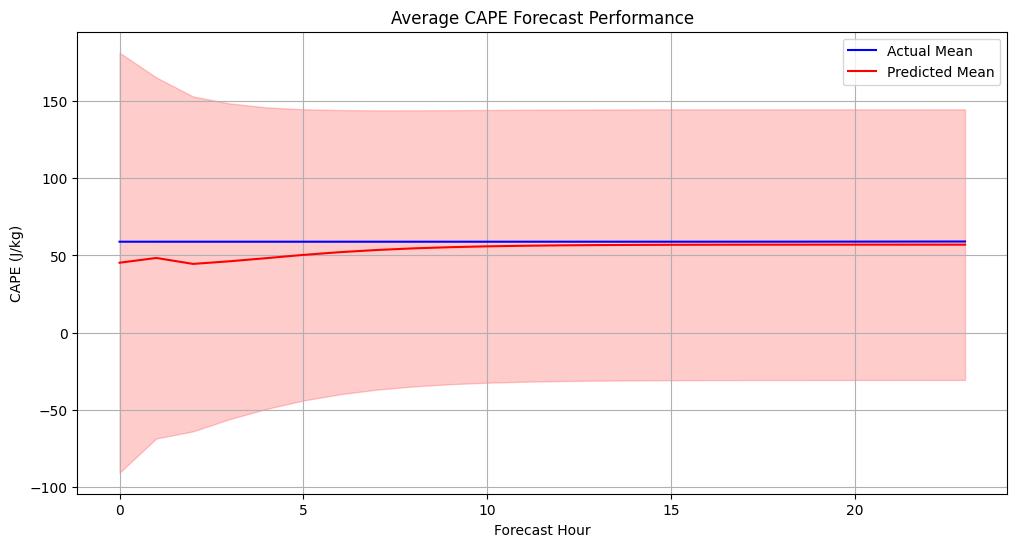

In [18]:
#Horizon-Aggregated View

plt.figure(figsize=(12, 6))
plt.plot(hours, y_true_cape.mean(axis=0), 'b-', label='Actual Mean')
plt.plot(hours, y_pred_cape.mean(axis=0), 'r-', label='Predicted Mean')
plt.fill_between(hours,
                y_pred_cape.mean(axis=0) - y_pred_cape.std(axis=0),
                y_pred_cape.mean(axis=0) + y_pred_cape.std(axis=0),
                color='r', alpha=0.2)
plt.title("Average CAPE Forecast Performance")
plt.xlabel("Forecast Hour")
plt.ylabel("CAPE (J/kg)")
plt.legend()
plt.grid(True)
plt.show()

#### This indicates that the model has good overall calibration but imperfect individual predictions.

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


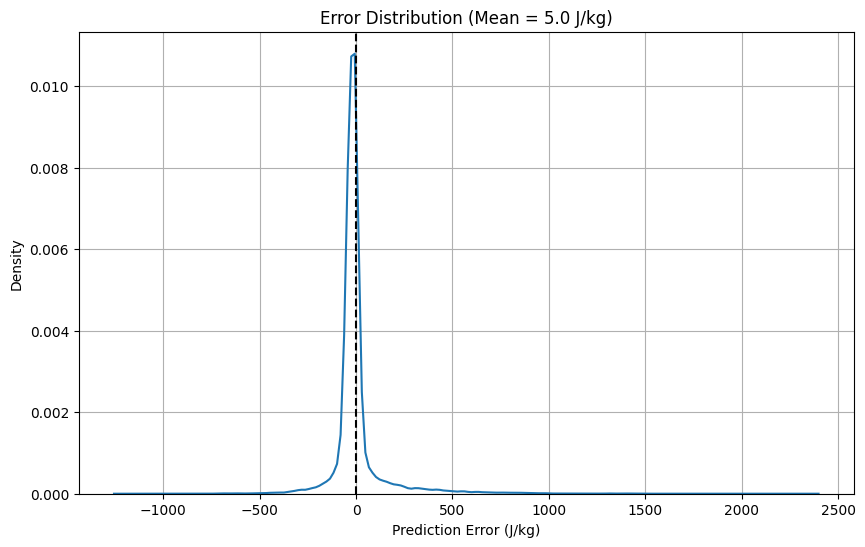

In [23]:
#Error Distribution Analysis

import seaborn as sns 

plt.figure(figsize=(10,6))
sns.kdeplot((y_true_cape - y_pred_cape).ravel(), label='Hourly Errors')
plt.axvline(0, color='k', linestyle='--')
plt.title("Error Distribution (Mean = {:.1f} J/kg)".format(np.mean(y_true_cape - y_pred_cape)))
plt.xlabel("Prediction Error (J/kg)")
plt.grid(True)

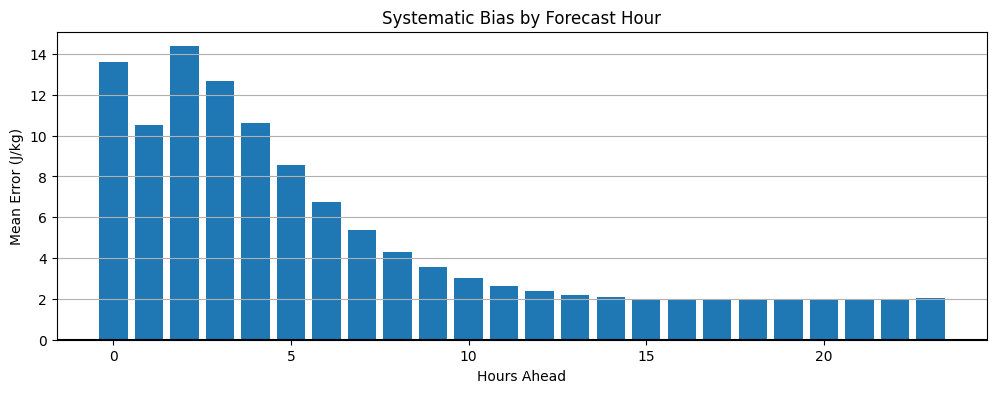

In [24]:
# Temporal error pattern

hourly_bias = np.mean(y_true_cape - y_pred_cape, axis=0)
plt.figure(figsize=(12,4))
plt.bar(range(24), hourly_bias)
plt.title("Systematic Bias by Forecast Hour")
plt.xlabel("Hours Ahead")
plt.ylabel("Mean Error (J/kg)")
plt.axhline(0, color='k')
plt.grid(axis='y')

#### Initial overprediction: Highest bias at hour 0 but it's corrected rapidly.